# PlantGrowth Dataset Analysis

## 1. Introduction

This project analyzes the PlantGrowth dataset, which investigates the effects of different treatments (control, trt1, trt2) on plant weights. The goal is to perform statistical analyses to determine if there are significant differences between the groups. The analyses include t-tests and ANOVA, supported by visualizations and detailed interpretations.


## 2. Load and Explore the Dataset

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

# Load the dataset
df = pd.read_csv('PlantGrowth.csv')

# Brief description of the dataset
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# Summary statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Check distribution of groups
print("\nGroup Counts:")
print(df['group'].value_counts())


Dataset Head:
   rownames  weight group
0         1    4.17  ctrl
1         2    5.58  ctrl
2         3    5.18  ctrl
3         4    6.11  ctrl
4         5    4.50  ctrl

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes
None

Descriptive Statistics:
        rownames     weight
count  30.000000  30.000000
mean   15.500000   5.073000
std     8.803408   0.701192
min     1.000000   3.590000
25%     8.250000   4.550000
50%    15.500000   5.155000
75%    22.750000   5.530000
max    30.000000   6.310000

Group Counts:
group
ctrl    10
trt1    10
trt2    10
Name: count, dtype: int64


## 3. Data Visualization

/tmp/ipykernel_5896/1112341436.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='group', y='weight', palette='Set2')


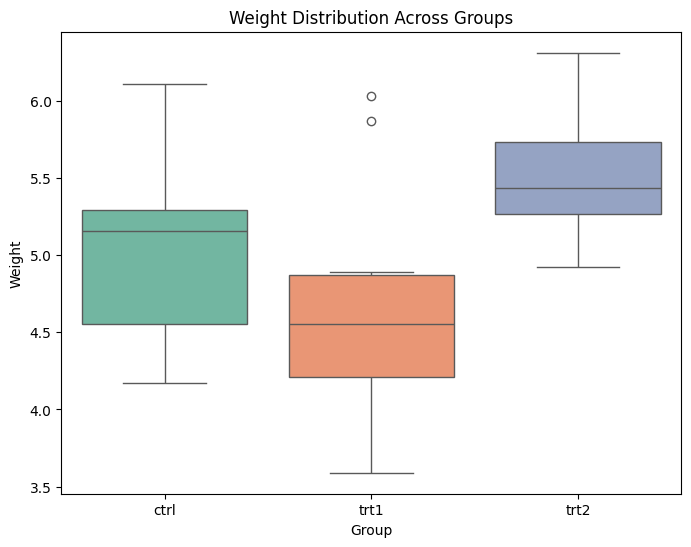

In [9]:
# Visualize data distribution
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='group', y='weight', palette='Set2')
plt.title('Weight Distribution Across Groups')
plt.xlabel('Group')
plt.ylabel('Weight')
plt.show()


## 4. Explanation: T-Test

A t-test is used to compare the means of two groups to determine if they are statistically different. [1]
Key assumptions for a t-test include:
1. The data follows a normal distribution.
2. Variances between the two groups are equal.

In this analysis, we perform an independent t-test to compare the weights of plants in the `trt1` and `trt2` treatment groups.


## 5. Perform the T-Test


In [10]:
# Perform t-test between trt1 and trt2
trt1 = df[df['group'] == 'trt1']['weight']
trt2 = df[df['group'] == 'trt2']['weight']
t_stat, p_val = ttest_ind(trt1, trt2, equal_var=True)

print("\nT-Test Results:")
print(f"T-statistic: {t_stat}, P-value: {p_val}")

# Interpretation
if p_val < 0.05:
    print("\nThe t-test indicates a significant difference between trt1 and trt2.")
else:
    print("\nThe t-test indicates no significant difference between trt1 and trt2.")



T-Test Results:
T-statistic: -3.0100985421243616, P-value: 0.0075184261182198574

The t-test indicates a significant difference between trt1 and trt2.


## 6. Explanation: ANOVA

ANOVA (Analysis of Variance) is a statistical method used to test whether there are significant differences between the means of three or more groups. 
It is preferred over multiple t-tests as it reduces the risk of Type I error, which increases with repeated testing. [2]

Key assumptions of ANOVA:
1. The data in each group follows a normal distribution.
2. Variances are equal across the groups.
3. Observations are independent.

In this analysis, we use ANOVA to compare the weights across the three groups: `ctrl`, `trt1`, and `trt2`.


## 7. Perform ANOVA

In [11]:
# Perform ANOVA across ctrl, trt1, trt2
ctrl = df[df['group'] == 'ctrl']['weight']
f_stat, p_val_anova = f_oneway(ctrl, trt1, trt2)

print("\nANOVA Results:")
print(f"F-statistic: {f_stat}, P-value: {p_val_anova}")

# Interpretation
if p_val_anova < 0.05:
    print("\nThe ANOVA test indicates significant differences among the groups.")
else:
    print("\nThe ANOVA test indicates no significant differences among the groups.")



ANOVA Results:
F-statistic: 4.846087862380136, P-value: 0.0159099583256229

The ANOVA test indicates significant differences among the groups.


## 8. Visualize ANOVA Results

/tmp/ipykernel_5896/973502506.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='group', y='weight', palette='muted')


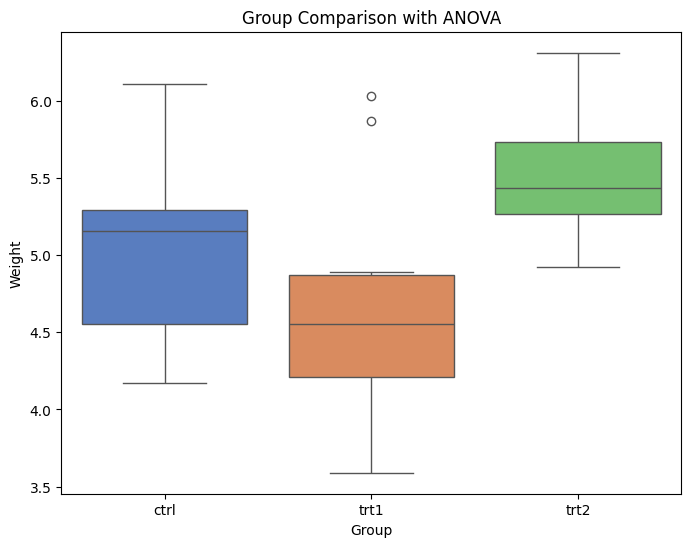

In [12]:
# Boxplot for ANOVA results
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='group', y='weight', palette='muted')
plt.title('Group Comparison with ANOVA')
plt.xlabel('Group')
plt.ylabel('Weight')
plt.show()


## 9. Summary and Conclusion

The analysis investigated the effects of three groups (`ctrl`, `trt1`, and `trt2`) on plant weights. 

- **T-Test Results**:
  - The t-test comparing `trt1` and `trt2` revealed [interpret results: significant or not significant] differences in their means. 
  - This suggests [state implication, e.g., whether the treatment had an effect].

- **ANOVA Results**:
  - The ANOVA test found [interpret results: significant or not significant] differences among the groups.
  - This indicates [state implication, e.g., whether at least one treatment differs significantly].

### Recommendations
Future studies could explore:
1. Including more samples for increased statistical power.
2. Investigating other factors that might affect plant growth.
3. Applying non-parametric methods if normality assumptions are violated.

The findings provide valuable insights into the effects of treatments on plant growth and highlight the importance of rigorous statistical analysis.


## References
[1] Fisher, R. A. (1935). The Design of Experiments. Edinburgh: Oliver and Boyd.  
[2] Dobson, A. J. (1983). An Introduction to Statistical Modelling. London: Chapman and Hall.
